# Importing Packages

In [ ]:
#import pandas as pd
import pandas as pd

#import numpy as np
import numpy as np

#import matplotlib
import matplotlib.pyplot as plt

#import Seaborn as sns
import seaborn as sns

#Import datetime library to compile date and time data
from datetime import datetime

#Import StandardScaler to standardize the features
from sklearn.preprocessing import StandardScaler

#Import KMeans Algorithm
from sklearn.cluster import KMeans

#Import Silhouette Score Method
from sklearn.metrics import silhouette_score

#Import Cdist to calculate the distance between clustering
from scipy.spatial.distance import cdist

#Import Silhouette Visualizer to check the silhouette output
from yellowbrick.cluster import SilhouetteVisualizer

#Import MinMaxScaler - If the Data Consist a lot of identical values and 0.0
from sklearn.preprocessing import MinMaxScaler

#Import PowerTransformer Scaler
from sklearn.preprocessing import PowerTransformer

#Import Robust Scaler because the data consist of an outlier
from sklearn.preprocessing import RobustScaler

#Import PCA for the visualization
from sklearn.decomposition import PCA

# DataSet Ingestion

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DEEP/dfAll_cleaned.csv')
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,Main_Category,Sub_Category,rating_score,difference_price,user_id,user_name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home & Kitchen,Kitchen & Home Appliances,Above Average,540.0,AEWPCJ6MCXV32JXQHYGODOOEIJNA,Rahul sharma
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home & Kitchen,Kitchen & Home Appliances,Above Average,765.0,AGFSVYPXDMWJWF53N4TWY3SNOA2A,SEKAR
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average,861.0,AGAI5NULVI4W3QO5HBFOWS5S6TDQ,Nilesh Madhani
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home & Kitchen,"Heating, Cooling & Air Quality",Above Average,491.0,AGLP2ACOBJSBZ276KMDD733NQQFA,Saurabh Dongre


## DataSet Checking

Process of Checking :

1.   Checking DataSet by **df.info()** to check does it match with the cleaned that we've already done before
2.   Make sure the columns by using **df.columns**
3.   Identifying the dataset by descriptive statistics using **df.describe()**



In [ ]:
# Checking all the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1465 non-null   float64
 6   rating_count         1463 non-null   float64
 7   Main_Category        1465 non-null   object 
 8   Sub_Category         1465 non-null   object 
 9   rating_score         1465 non-null   object 
 10  difference_price     1465 non-null   float64
 11  user_id              1465 non-null   object 
 12  user_name            1465 non-null   object 
dtypes: float64(6), object(7)
memory usage: 148.9+ KB


In [ ]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'Main_Category',
       'Sub_Category', 'rating_score', 'difference_price', 'user_id',
       'user_name'],
      dtype='object')

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,difference_price
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096519,18295.541353,2319.679761
std,6944.304394,10874.826864,0.216359,0.291585,42753.864952,4604.473790
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000,371.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000,800.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000,1953.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000,61910.000000


# Product Category Analysis

Process of Analysing the Product Category :

*   Determining which Sub_Category belongs to Main_Category
*   Most Amount Products by Main Category
*   Most Amount Products by Sub Category
*   Top 5 **Most Expensive** Products using **Difference Price**(Actual_Price - Discount_Percentage)
*   Top 5 **Cheapest** Products using **Difference Price**(Actual_Price - Discount_Percentage)

## Determining Which Sub-Category belongs to Main Category

In [ ]:
#Main Category and Sub-Category

main_sub = df[['Main_Category', 'Sub_Category', 'product_id']]
main_sub = main_sub.rename(columns={'Main_Category' :'Main Category', 'Sub_Category' : 'Sub-Category', 'product_id':'Product ID'})
main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

## Most Amount Products by Main Category and Sub Category

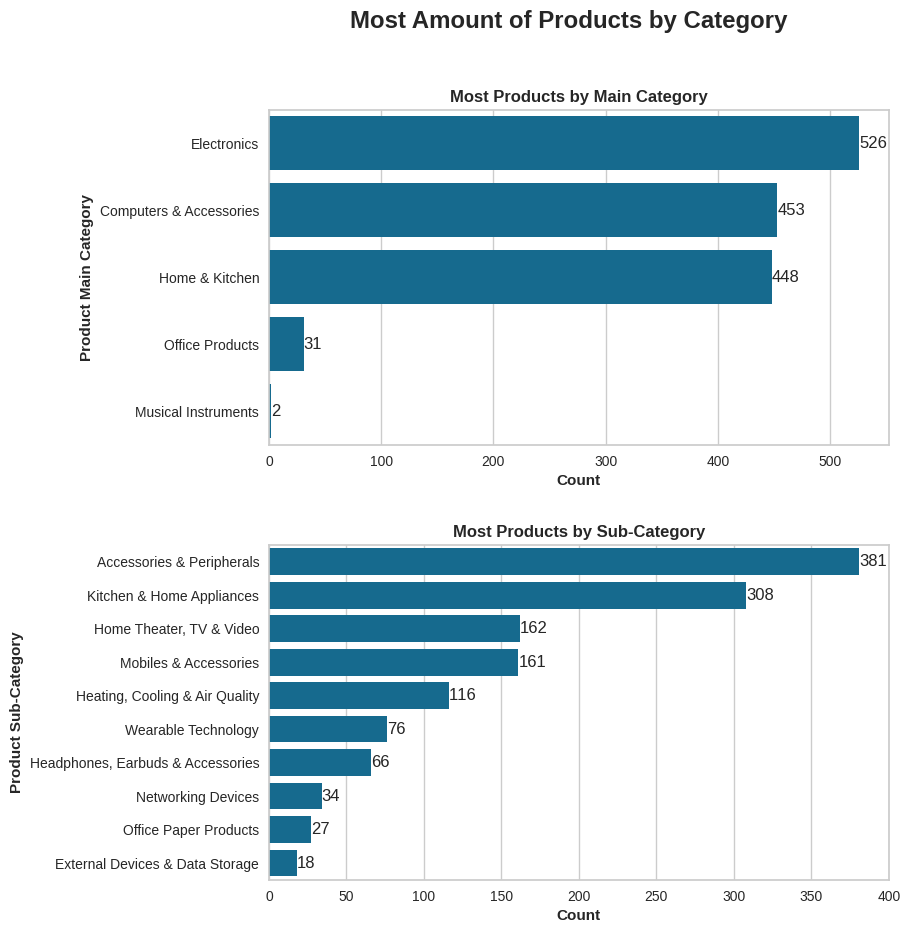

In [ ]:
# Main Category Section
most_main_items = df['Main_Category'].value_counts().head(5).rename_axis('Main_Category').reset_index(name='counts')

# Sub Category Section
most_sub_items = df['Sub_Category'].value_counts().head(10).rename_axis('Sub_Category').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='Main_Category')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='Sub_Category')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

### Amount of Products in each Main Category

In [ ]:
most_main_items

,Main_Category,counts
0,Electronics,526
1,Computers & Accessories,453
2,Home & Kitchen,448
3,Office Products,31
4,Musical Instruments,2


### Amount of Products in each Sub Category

In [ ]:
most_sub_items

,Sub_Category,counts
0,Accessories & Peripherals,381
1,Kitchen & Home Appliances,308
2,"Home Theater, TV & Video",162
3,Mobiles & Accessories,161
4,"Heating, Cooling & Air Quality",116
5,Wearable Technology,76
6,"Headphones, Earbuds & Accessories",66
7,Networking Devices,34
8,Office Paper Products,27
9,External Devices & Data Storage,18


## Top 5 Most Amount Expensive Product using Difference Pricing

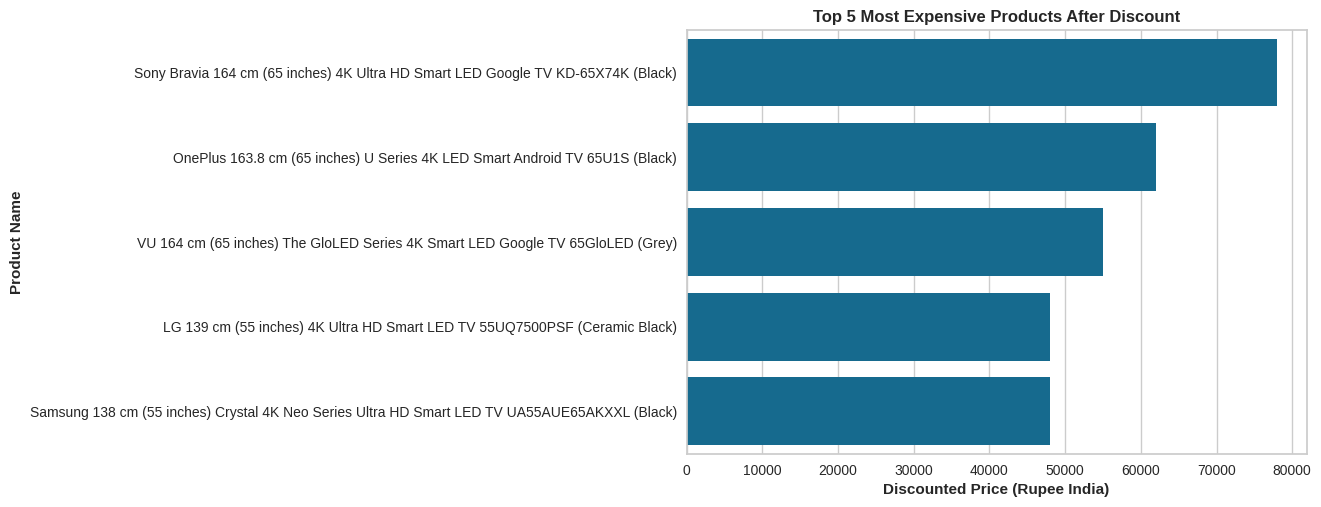

In [ ]:
#Top 5 Most Expensive Products After Discount

disc_exp = sns.barplot(data=df.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

## Top 5 Cheapest Product using Difference Pricing

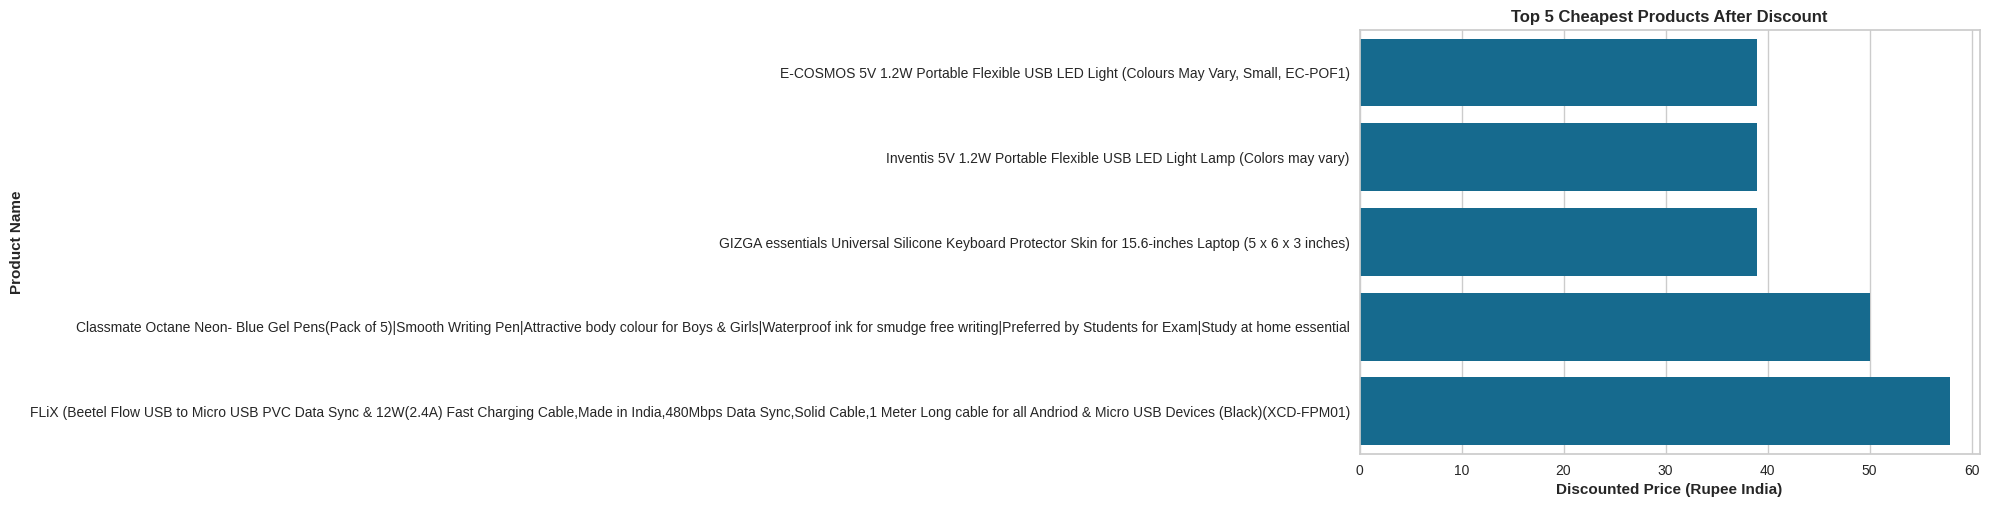

In [ ]:
#Top 5 Cheapest Products After Discount

disc_cheap = sns.barplot(data=df.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

# Product Ratings

## Rating & Amount of Rating Distribution

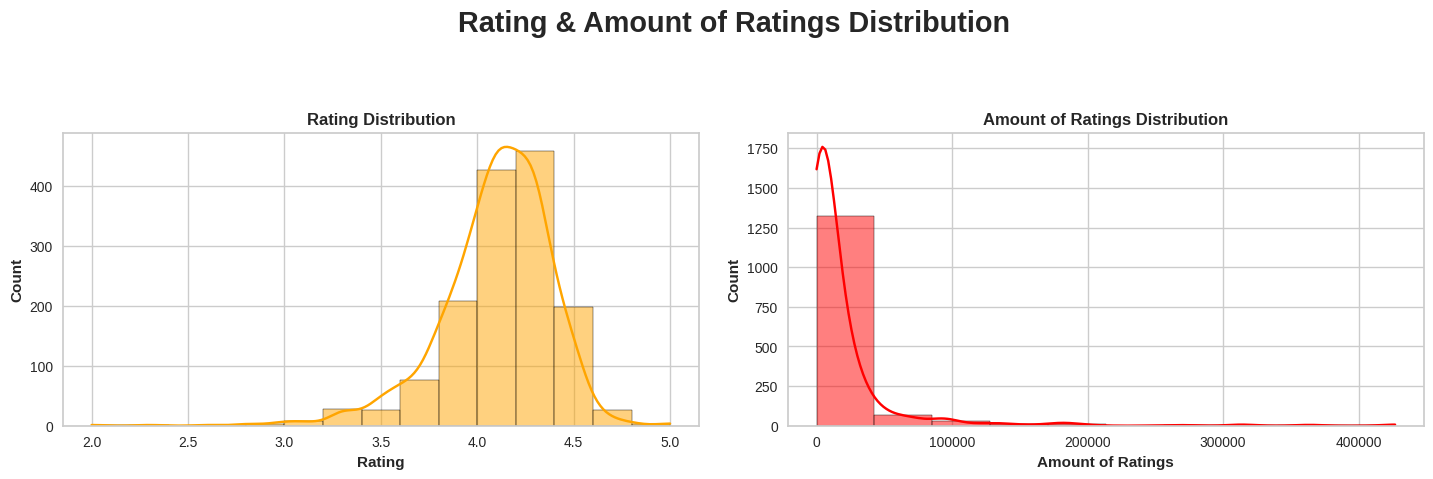

In [ ]:
#Rating & Amount of Rating Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df, x='rating', bins=15, kde=True, color='orange')
sns.histplot(ax=ax[1], data=df, x='rating_count', bins=10, kde=True, color='red')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

## Rating Distribution by Product Main Category

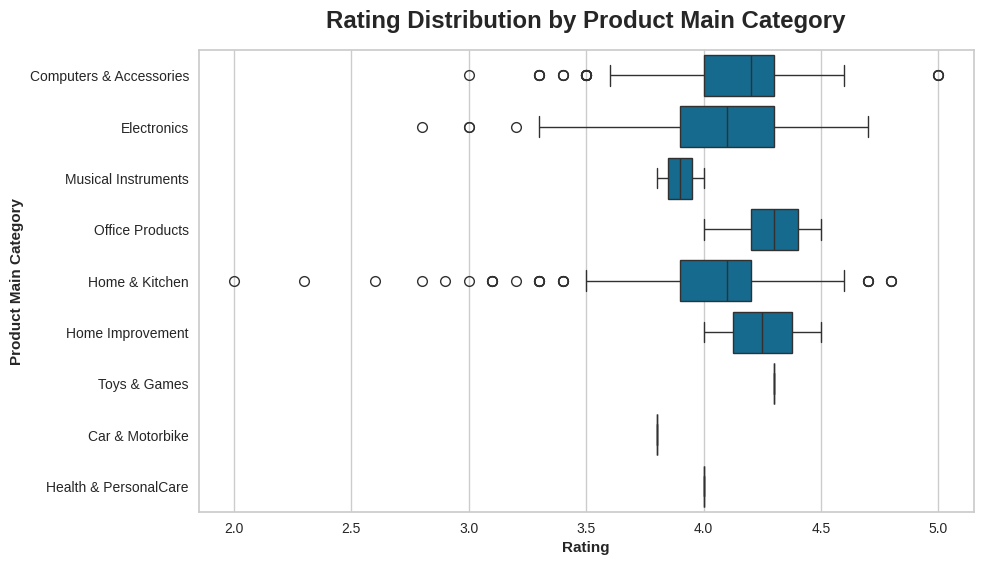

In [ ]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=df, x='rating', y='Main_Category')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Rating of Products based on Rating Category

In [ ]:
#Rating of Products based on Rating Category

rate_main_cat = df.groupby(['Main_Category','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat = rate_main_cat.rename(columns = {'Main_Category' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat

,Main Category,Rating Category,Amount
0,Car & Motorbike,Average,1
1,Computers & Accessories,Above Average,375
2,Computers & Accessories,Average,75
3,Computers & Accessories,Excellent,3
4,Electronics,Above Average,393
5,Electronics,Average,132
6,Electronics,Below Average,1
7,Health & PersonalCare,Above Average,1
8,Home & Kitchen,Above Average,304
9,Home & Kitchen,Average,139


## The Rating of all Products in Percentage

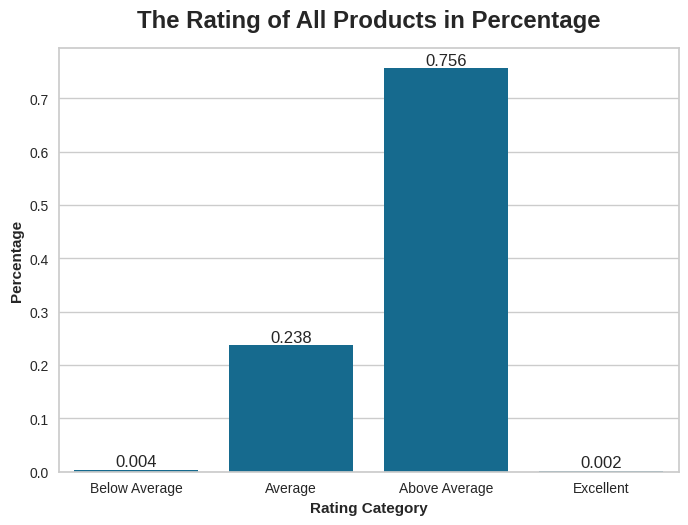

In [ ]:
#The Rating of All Products in Percentage

rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']

rating_count = df['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

## Pivot Table of Rating

In [ ]:
#Pivot table of Rating

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = df.pivot_table(values=['rating', 'rating_count'], index=['Main_Category', 'Sub_Category'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, index={'Main_Category': 'Main Category', 'Sub_Category': 'Sub Category'})

rating_pivot

<ipython-input-16-3fff4813f537>:9: FutureWarning: The provided callable <function median at 0x7bb04976b6a0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  rating_pivot = df.pivot_table(values=['rating', 'rating_count'], index=['Main_Category', 'Sub_Category'], aggfunc=([p25, np.median, np.mean, p75]))
<ipython-input-16-3fff4813f537>:9: FutureWarning: The provided callable <function mean at 0x7bb04c30e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  rating_pivot = df.pivot_table(values=['rating', 'rating_count'], index=['Main_Category', 'Sub_Category'], aggfunc=([p25, np.median, np.mean, p75]))


p25  \
                                                                     Rating   
Main_Category           Sub_Category                                          
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & Data Storage               4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
Main_Category           Sub_Category                                                
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                             NaN   
                        Components                                        2515.00   
                        External Devices & Data Storage                  19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10281.75   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                 9881.75   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           426.50   
             

# Reviewers

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


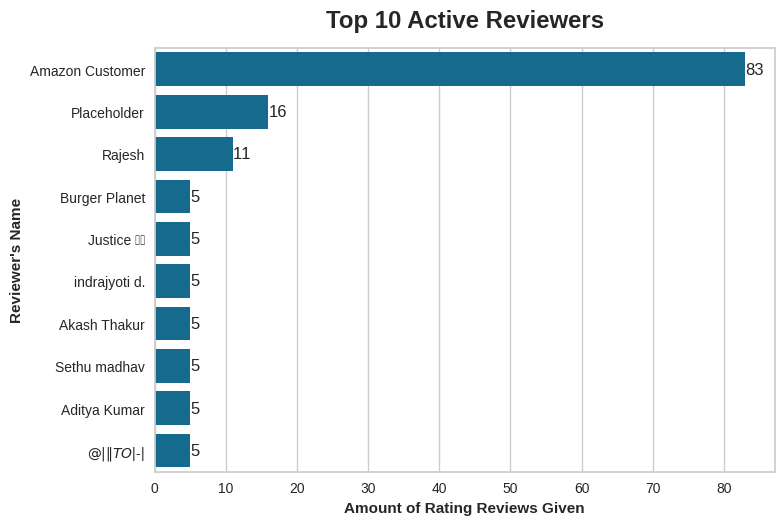

In [ ]:
#Reviewers who gave ratings and reviews for more than one product

top_reviewer = data=df['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

# Product Pricing

## Actual Price & Discounted Price Distribution

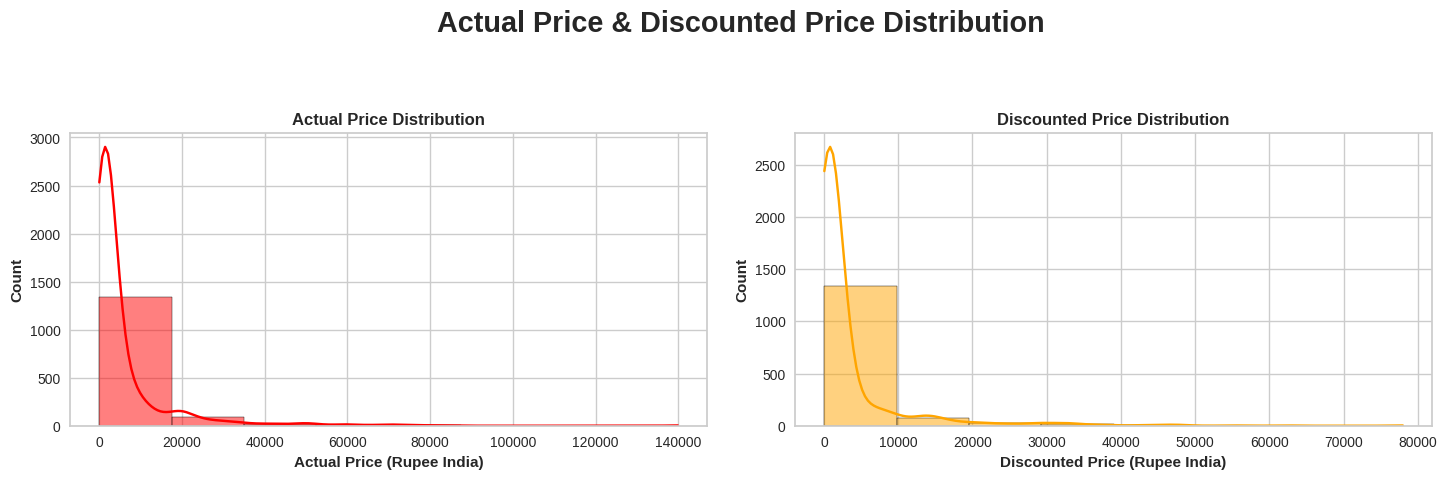

In [ ]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

## Discount Percentage Distribution

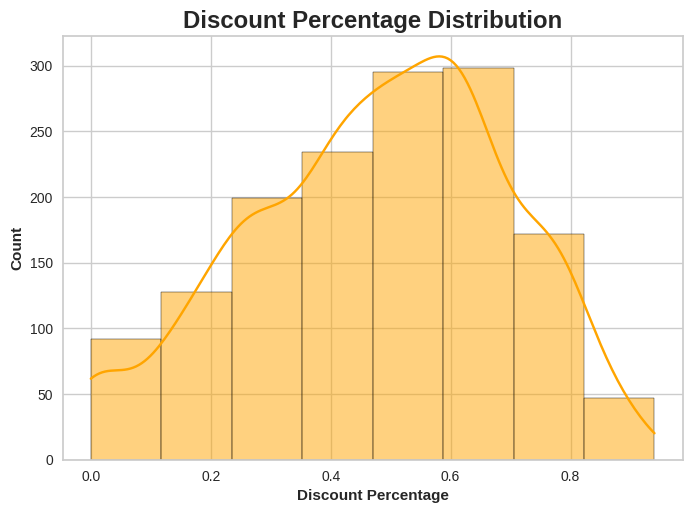

In [ ]:
#Discount Percentage Distribution

disc_hist = sns.histplot(data=df, x='discount_percentage', bins=8, kde=True, color='orange')


disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

## Specific Details in Discount Percentage

In [ ]:
#Specific Details about the Discount Percentage

df['discount_percentage'].describe()

,discount_percentage
count,1465.000000
mean,0.476915
std,0.216359
min,0.000000
25%,0.320000
50%,0.500000
75%,0.630000
max,0.940000


## Discount Range by Product | Main Category

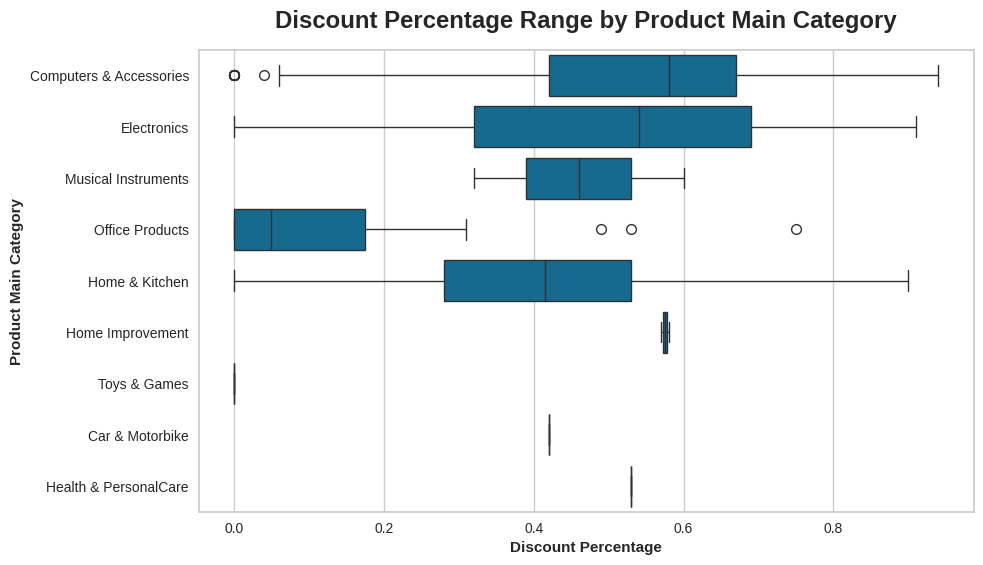

In [ ]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='discount_percentage', y='Main_Category')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()

## Discount Range by Product | Sub-Category

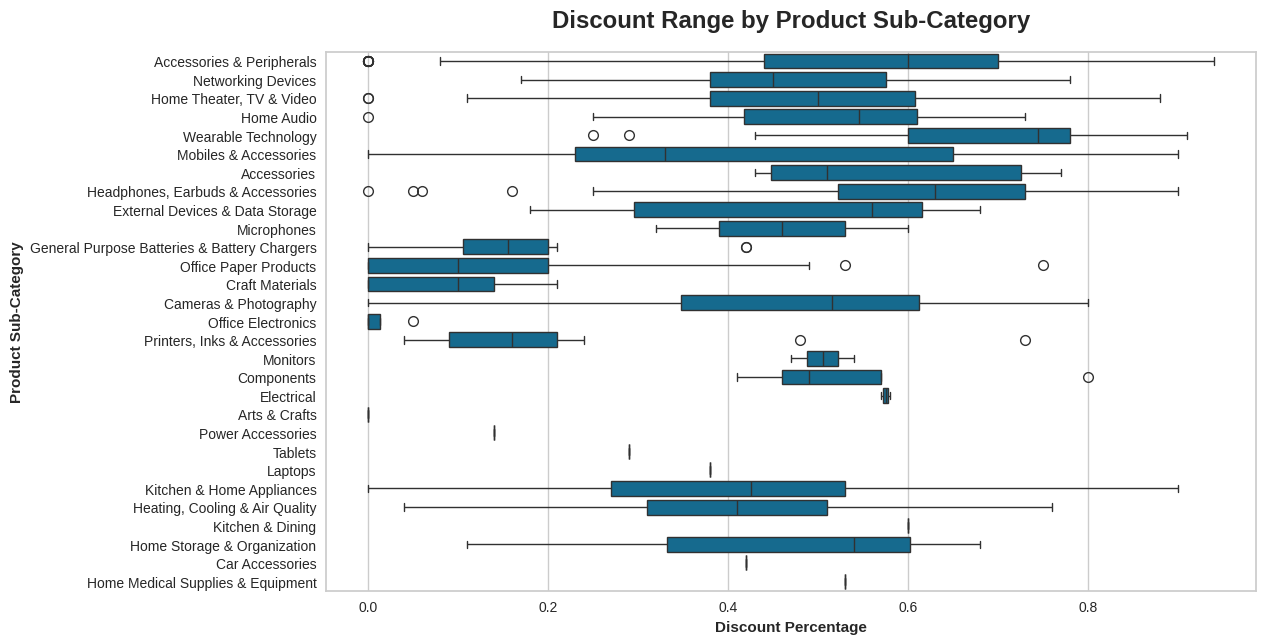

In [ ]:
# The Discount Range by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=df, x='discount_percentage', y='Sub_Category')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Actual Price Range and Discounted Price Range by Product | Main Category

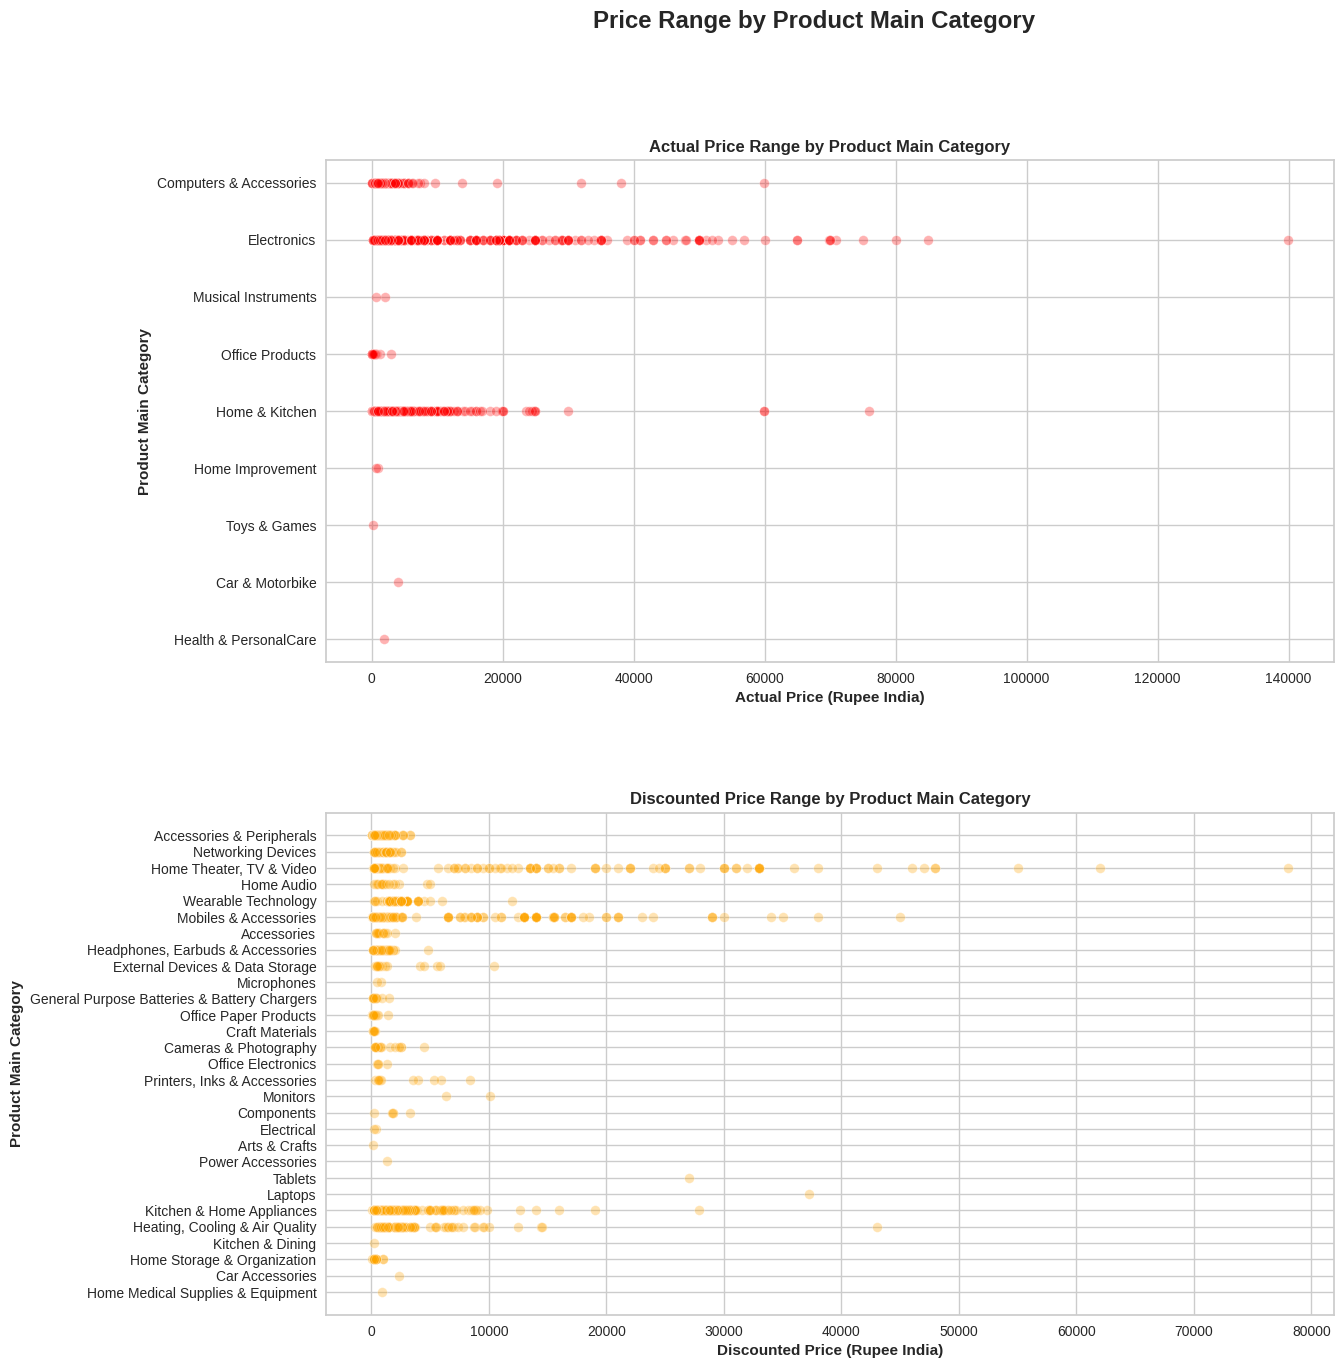

In [ ]:
#Actual Price Range and Discounted Price Range by Product Main Category

fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df, x='actual_price', y='Main_Category', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df, x='discounted_price', y='Sub_Category', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

## Actual Price Range and Discounted Price Range by Product | Sub Category

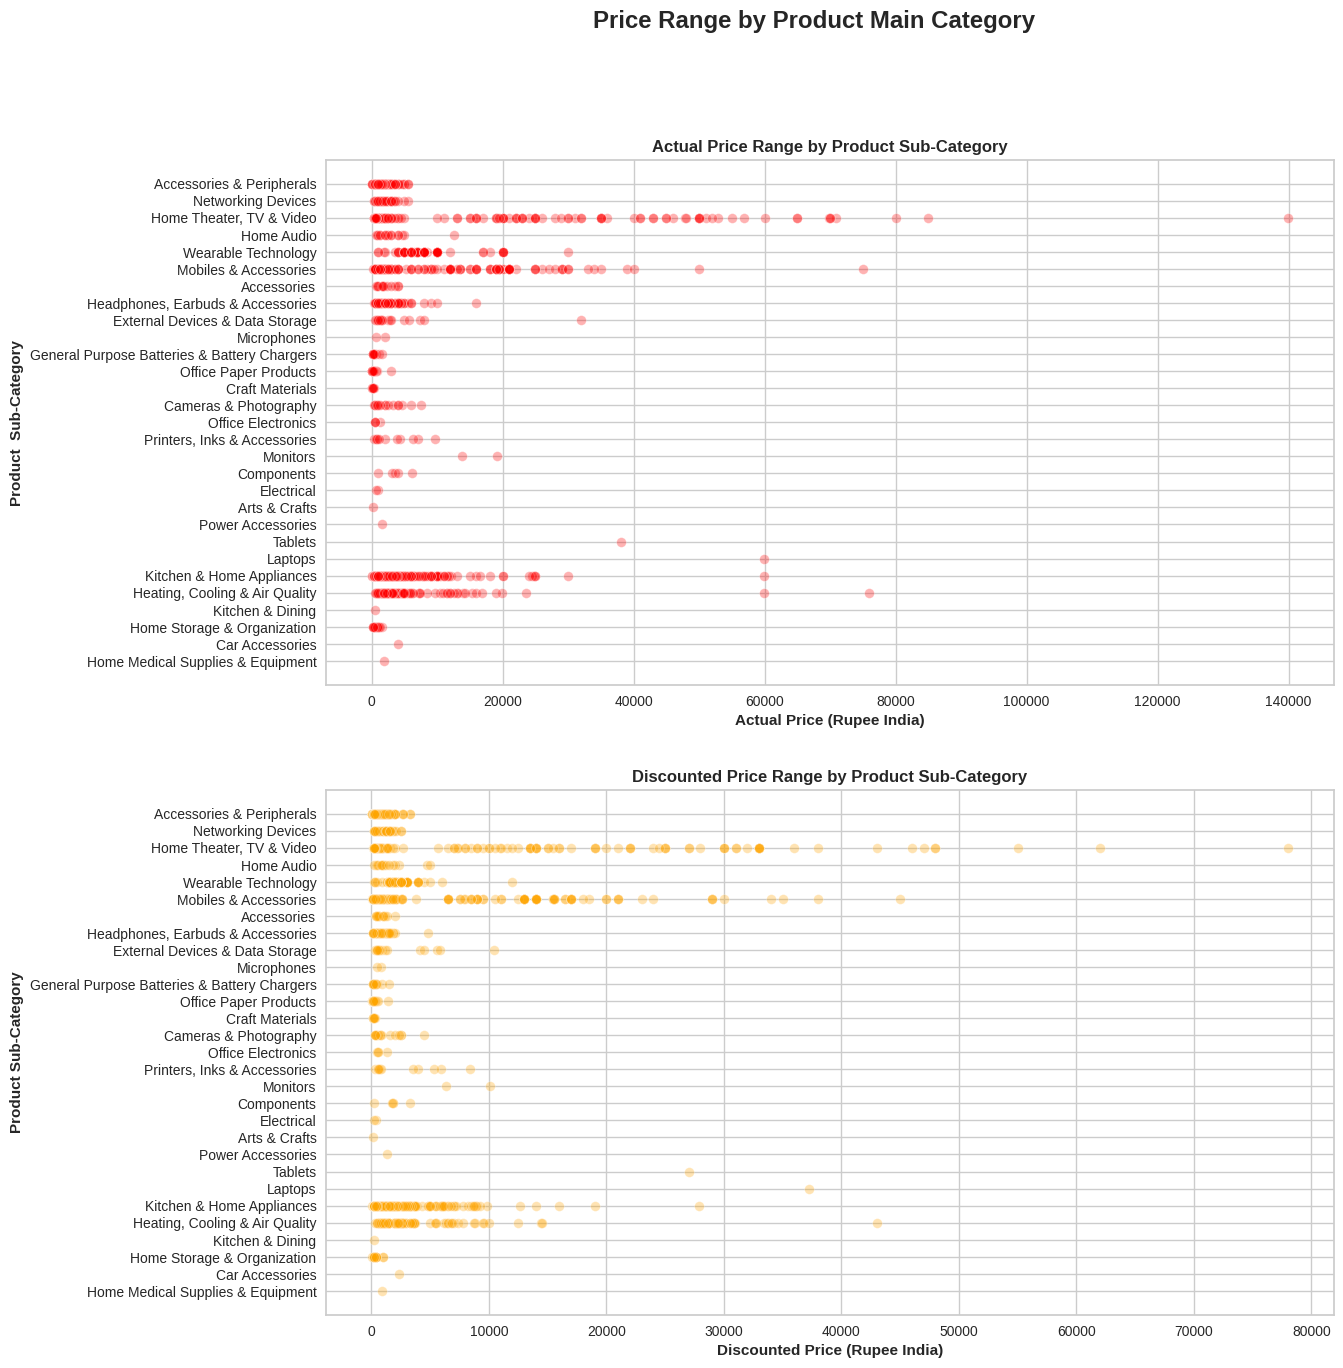

In [ ]:
#Actual Price Range and Discounted Price Range by Product Sub Category

fig, ax = plt.subplots(2, 1, figsize=(13, 15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df, x='actual_price', y='Sub_Category', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df, x='discounted_price', y='Sub_Category', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()

## Pivot Tables of Prices

In [ ]:
#Pivot table of Prices

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = df.pivot_table(values=['actual_price', 'discounted_price'], index=['Main_Category', 'Sub_Category'], aggfunc=([p25, np.median, np.mean, p75]))

actual_price_pivot

<ipython-input-26-a3c622f6ce01>:9: FutureWarning: The provided callable <function median at 0x7bb04976b6a0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  actual_price_pivot = df.pivot_table(values=['actual_price', 'discounted_price'], index=['Main_Category', 'Sub_Category'], aggfunc=([p25, np.median, np.mean, p75]))
<ipython-input-26-a3c622f6ce01>:9: FutureWarning: The provided callable <function mean at 0x7bb04c30e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  actual_price_pivot = df.pivot_table(values=['actual_price', 'discounted_price'], index=['Main_Category', 'Sub_Category'], aggfunc=([p25, np.median, np.mean, p75]))


p25  \
                                                                     actual_price   
Main_Category           Sub_Category                                                
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          499.00   
                        Components                                        3100.00   
                        External Devices & Data Storage                   1074.25   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                1208.00   
                        Printers, Inks & Accessories                       811.00   
                        Tablets                                          37999.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              946.00   
                        General Purpose Batteries & Battery Chargers       205.00   
                        Headphones, Earbuds & Accessories                  999.00   
                        Home Audio                                        1274.00   
                        Home Theater, TV & Video                           824.00   
                        Mobiles & Accessories                             1299.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               5999.00   
Health & PersonalCare   Home Medical Supplies & Equipment                 1900.00   
Home & Kitchen          Craft Materials                                    132.50   
                        Heating, Cooling & Air Quality                    1990.00   
                        Home Storage & Organization                        374.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1000.00   
Home Improvement        Electrical                                         699.00   
Musical Instruments     Microphones                                       1023.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
Main_Category           Sub_Category                                                    
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              199.00   
                        Components                                            1709.00   
                        External Devices & Data Storage                        504.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     530.00   
                        Printers, Inks & Accessories                           597.00   
                        Tablets                                              26999.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  386.50   
                        General Purpose Batteries & Battery Chargers           166.75   
                      

# Customer Segmentation

Process of Customer Segmentation Analysis :


* Assigning new DataFrame using selected column that correlate with the Customer Segmentation Category By Product
* Finding which scaler that fit with the dataset (in this case we are using Minmax Scaler - because the data have a lot of identical value whereas as we can see it have a lot of 0.0 data and there a lot of customer as well who doesn't made a purchase)
* Because we're using the MinMax Scaler and there are a lot of data that have Nan Value - in this i filled with 0 to solve the problem by can't optimize the data if there are Nan values
* Finding Optimal K using Elbow Method
* Making sure the K using Silhouette Method
* Implementing the K into a visualizations to know how the data spread
* Analyzing the Customer Segmentation




## Assigning New DataFrame for Clustering

In [ ]:
# Create user-category spending profiles using difference_price (final amount paid)
user_category_spending = df.groupby(['user_id', 'Main_Category']).agg({
    'product_id': 'count',  # Number of purchases
    'difference_price': 'sum',  # Total amount paid by customers (final price)
}).reset_index()

# Pivot the data to get categories as columns for actual spending
user_category_pivot = user_category_spending.pivot_table(
    index='user_id',
    columns='Main_Category',
    values='difference_price',  # This is the final price paid
    aggfunc='sum',
    fill_value=0
)

# Add total spending as a feature
user_category_pivot['total_spending'] = user_category_pivot.sum(axis=1)

# Normalize the spending by category (percentage of total spending)
category_columns = user_category_pivot.columns.tolist()[:-1]  # All except total_spending
for col in category_columns:
    user_category_pivot[f'{col}_pct'] = user_category_pivot[col] / user_category_pivot['total_spending']

# Add purchase frequency and discount features
purchase_summary = df.groupby('user_id').agg({
    'product_id': 'count',  # Number of purchases
    'discount_percentage': 'mean',  # Average discount percentage
    'actual_price': 'mean',  # Average original price of purchased items
    'discounted_price': 'mean',  # Average discount amount received
}).reset_index()

purchase_summary.columns = ['user_id', 'purchase_count', 'avg_discount_percentage', 'avg_original_price', 'avg_discount_amount']

# Calculate average savings ratio (discount amount / original price)
purchase_summary['avg_savings_ratio'] = purchase_summary['avg_discount_amount'] / purchase_summary['avg_original_price']

# Merge with user_category_pivot
user_category_pivot = user_category_pivot.reset_index().merge(purchase_summary, on='user_id')

# Select features for clustering
clustering_features = [f'{col}_pct' for col in category_columns] + ['purchase_count', 'avg_discount_percentage', 'avg_savings_ratio']
cluster_df = user_category_pivot[clustering_features]

In [ ]:
#Checking The New DataFrame
cluster_df

,Car & Motorbike_pct,Computers & Accessories_pct,Electronics_pct,Health & PersonalCare_pct,Home & Kitchen_pct,Home Improvement_pct,Musical Instruments_pct,Office Products_pct,Toys & Games_pct,purchase_count,avg_discount_percentage,avg_savings_ratio
0,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1,0.620,0.384231
1,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,0.670,0.332592
2,0.0,0.535523,0.000000,0.0,0.464477,0.0,0.0,0.0,0.0,2,0.385,0.616249
3,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2,0.520,0.448622
4,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,0.570,0.434124
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.0,0.033233,0.966767,0.0,0.000000,0.0,0.0,0.0,0.0,2,0.460,0.623847
1098,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,0.330,0.671424
1099,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1,0.250,0.749873
1100,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1,0.400,0.599500


## Defining The Scaler

In [ ]:
# Standardize the data
# Using MinMaxScaler which handles 0 values better
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(cluster_df)
scaled_df = pd.DataFrame(scaled_features, columns=clustering_features)

### Handling the Scaler Problem and Defining K Values

In [ ]:
#Checking if there are NaN values in the scaled dataset
print("NaN values in scaled_df:", scaled_df.isna().sum().sum())

# Fill NaN values with zeros (appropriate if NaNs represent no spending in a category)
scaled_df = scaled_df.fillna(0)

# If you want to use a different imputation strategy
from sklearn.impute import SimpleImputer

# Create an imputer that replaces NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
scaled_features_imputed = imputer.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_features_imputed, columns=scaled_df.columns)

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score (for k >= 2)
    if k > 1:
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_df, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

NaN values in scaled_df: 288


### Plot to check the Elbow Method and Silhouette Method Results for K values

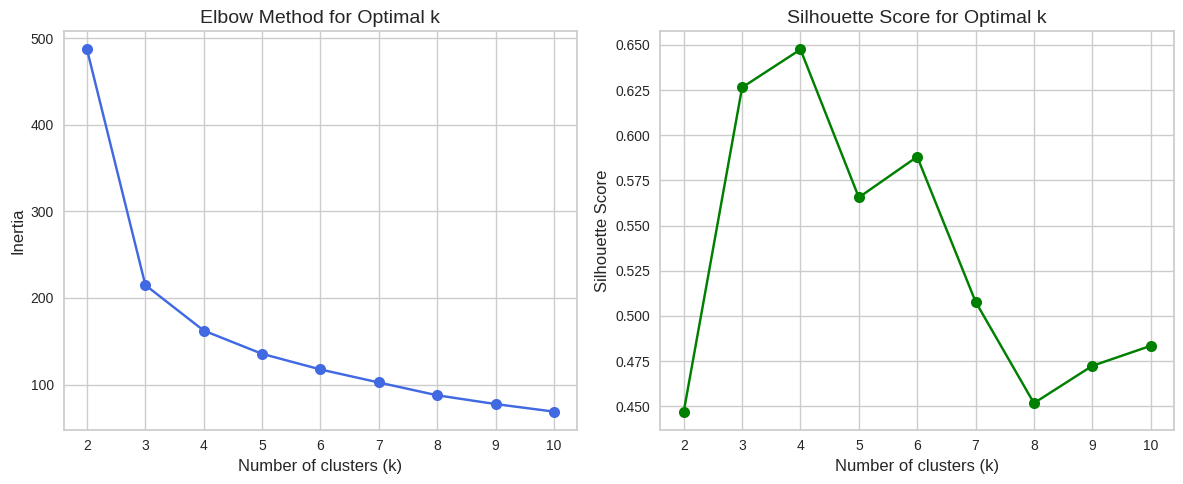

In [ ]:
# Plot the Elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8, c='royalblue')
plt.grid(True)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8, c='green')
plt.grid(True)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k', fontsize=14)

plt.tight_layout()
plt.show()

In This Result : I'm taking 4 as my K Values because

*   The Silhouette Score is highest at k=4 (approximately 0.65), indicating the best cluster separation and cohesion
* The Elbow Method shows diminishing returns after k=4
* The combination of both methods pointing to k=4 strengthens this conclusion



## K Means Execution - Customer Segments

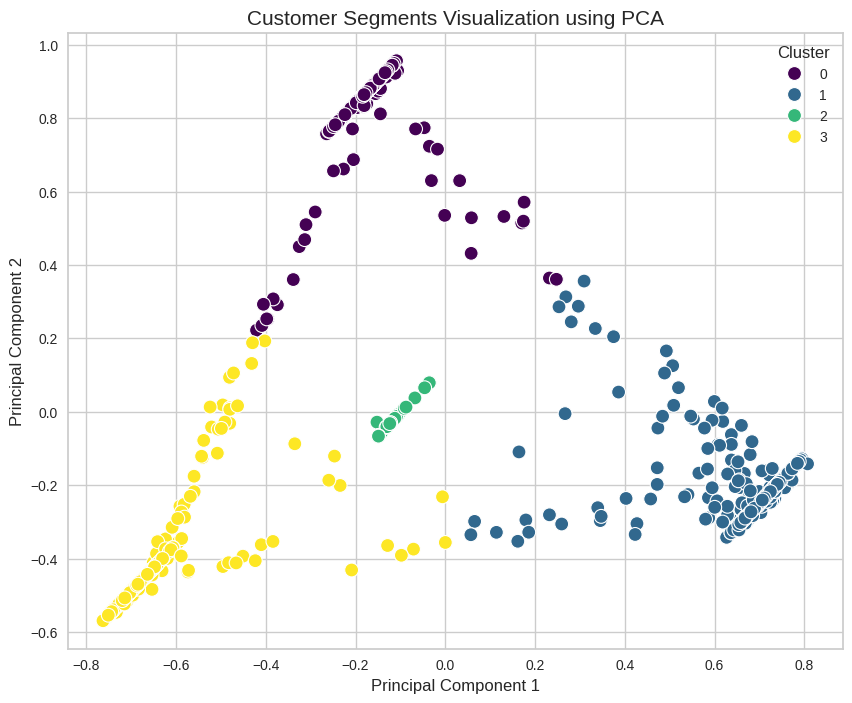

In [ ]:
# Apply K-means with the optimal K = 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# Fit kmeans and get predictions
cluster_labels = kmeans.fit_predict(scaled_df)

# Create a new column in scaled_df for clusters (don't try to assign to original df)
scaled_df_with_clusters = scaled_df.copy()
scaled_df_with_clusters['cluster'] = cluster_labels

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100)
plt.title('Customer Segments Visualization using PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

## Plot The Customer Segmentation Results

Cluster Characteristics:
   cluster  discounted_price  actual_price  discount_percentage    rating  \
0        0       3603.050592   6360.459930             0.495958  4.113937   
1        1       2837.339257   5024.900863             0.507818  4.115348   
2        2       3930.000000   6396.183673             0.441837  4.124490   
3        3       3600.635043   6074.253926             0.506304  4.117192   

   rating_count  difference_price  product_id  
0  24574.982578       2757.409338         287  
1  22639.423077       2187.561607         417  
2  26344.081633       2466.183673          49  
3  21825.767241       2473.618883         349  


<ipython-input-10-64883eeb6434>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=cluster_analysis, palette=amazon_palette)
<ipython-input-10-64883eeb6434>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=cluster_analysis, palette=amazon_palette)
<ipython-input-10-64883eeb6434>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=cluster_analysis, palette=amazon_palette)
<ipython-input-10-64883eeb6434>:38: FutureWarning: 

Passing `palette` without assigning

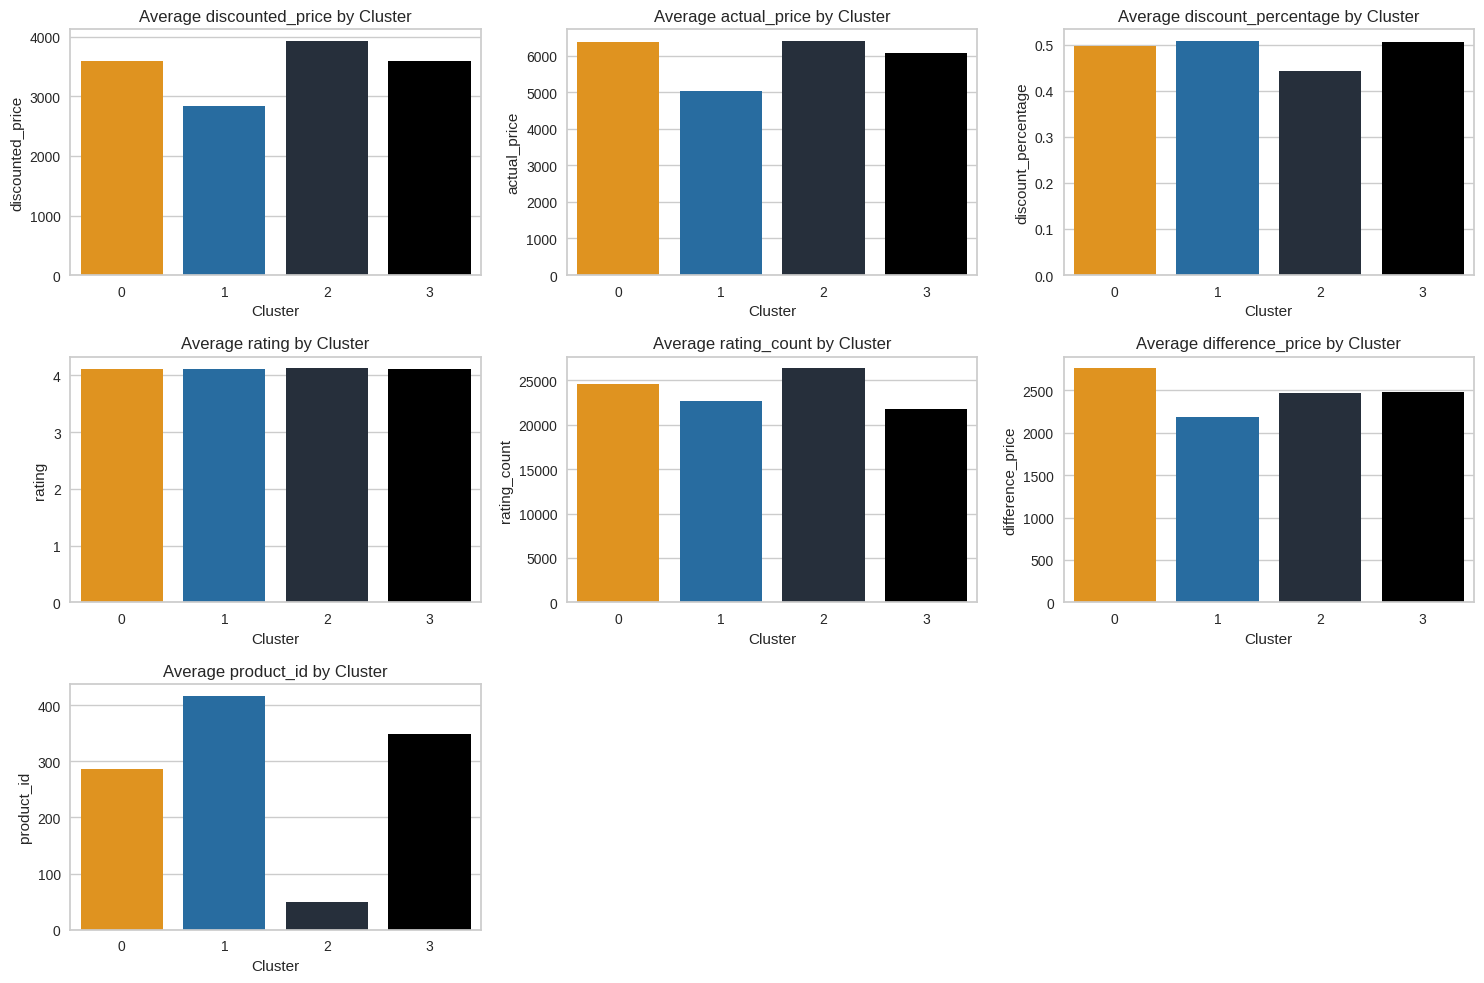

In [ ]:
# Analyzing the characteristics of each cluster
# First, add original features to the cluster dataframe
# Get the index from scaled_df to ensure we're matching the right rows
cluster_analysis_df = scaled_df_with_clusters.copy()

# Get the indices of rows that exist in scaled_df
valid_indices = scaled_df.index

# Use only matching rows from the original df for analysis
valid_df = df.loc[valid_indices].copy()
valid_df['cluster'] = cluster_labels

# Now perform the cluster analysis on valid_df
cluster_analysis = valid_df.groupby('cluster').agg({
    'discounted_price': 'mean',
    'actual_price': 'mean',
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'mean',
    'difference_price': 'mean',
    'product_id': 'count'  # Number of purchases
}).reset_index()

print("Cluster Characteristics:")
print(cluster_analysis)

# Visualize cluster characteristics
plt.figure(figsize=(15, 10))
# Use only features that exist in cluster_analysis dataframe
available_features = [col for col in cluster_analysis.columns if col != 'cluster']

#Amazon Color Palette
amazon_palette = ['#FF9900', '#146EB4', '#232F3E', '#000000']

for i, feature in enumerate(available_features):
    if i < 9:  # Limit to 9 subplots
        plt.subplot(3, 3, i+1)
        sns.barplot(x='cluster', y=feature, data=cluster_analysis, palette=amazon_palette)
        plt.title(f'Average {feature} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
#Checking the Cluster Analysis Result
cluster_analysis

,cluster,discounted_price,actual_price,discount_percentage,rating,rating_count,difference_price,product_id
0,0,3603.050592,6360.459930,0.495958,4.113937,24574.982578,2757.409338,287
1,1,2837.339257,5024.900863,0.507818,4.115348,22639.423077,2187.561607,417
2,2,3930.000000,6396.183673,0.441837,4.124490,26344.081633,2466.183673,49
3,3,3600.635043,6074.253926,0.506304,4.117192,21825.767241,2473.618883,349


## Checking The DataFrame that already assigned the clusters

In [ ]:
#Checkin
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 0 to 1101
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1102 non-null   object 
 1   product_name         1102 non-null   object 
 2   discounted_price     1102 non-null   float64
 3   actual_price         1102 non-null   float64
 4   discount_percentage  1102 non-null   float64
 5   rating               1102 non-null   float64
 6   rating_count         1100 non-null   float64
 7   Main_Category        1102 non-null   object 
 8   Sub_Category         1102 non-null   object 
 9   rating_score         1102 non-null   object 
 10  difference_price     1102 non-null   float64
 11  user_id              1102 non-null   object 
 12  user_name            1102 non-null   object 
 13  cluster              1102 non-null   int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 124.8+ KB


## Segments Pricing Sensitivity

<ipython-input-13-77b9ddfe5896>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-13-77b9ddfe5896>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-13-77b9ddfe5896>:61: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


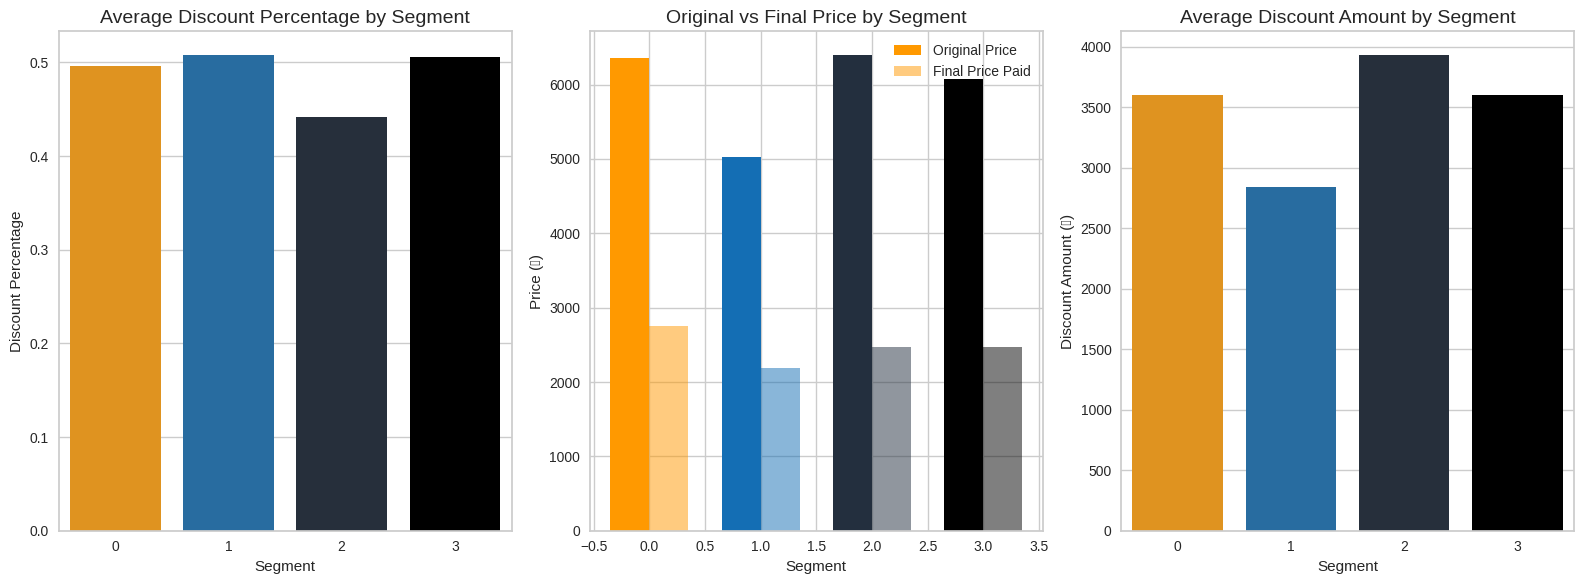

In [ ]:
# Amazon Color Palette
amazon_palette = ['#FF9900', '#146EB4', '#232F3E', '#000000']  # Adjust length if clusters > 4

# Analyze price sensitivity across segments
segment_price_sensitivity = valid_df.groupby('cluster').agg({
    'actual_price': 'mean',  # Original price
    'discounted_price': 'mean',  # Discount amount received
    'difference_price': 'mean',  # Final price paid
    'discount_percentage': 'mean',  # Discount percentage
}).reset_index()

# Add discount ratio (discount amount / original price)
segment_price_sensitivity['discount_ratio'] = (
    segment_price_sensitivity['discounted_price'] / segment_price_sensitivity['actual_price']
)

# Visualize price sensitivity
plt.figure(figsize=(16, 6))

# Chart 1: Discount Percentage
plt.subplot(1, 3, 1)
sns.barplot(
    x='cluster',
    y='discount_percentage',
    data=segment_price_sensitivity,
    palette=amazon_palette
)
plt.title('Average Discount Percentage by Segment', fontsize=14)
plt.xlabel('Segment')
plt.ylabel('Discount Percentage')

# Chart 2: Original vs Final Price
plt.subplot(1, 3, 2)
x = segment_price_sensitivity['cluster']
width = 0.35

for i, cluster in enumerate(x):
    color = amazon_palette[i % len(amazon_palette)]
    plt.bar(cluster - width/2, segment_price_sensitivity.loc[i, 'actual_price'], width,
            label='Original Price' if i == 0 else "", color=color)
    plt.bar(cluster + width/2, segment_price_sensitivity.loc[i, 'difference_price'], width,
            label='Final Price Paid' if i == 0 else "", color=color, alpha=0.5)

plt.title('Original vs Final Price by Segment', fontsize=14)
plt.xlabel('Segment')
plt.ylabel('Price (₹)')
plt.legend()

# Chart 3: Discounted Price
plt.subplot(1, 3, 3)
sns.barplot(
    x='cluster',
    y='discounted_price',
    data=segment_price_sensitivity,
    palette=amazon_palette
)
plt.title('Average Discount Amount by Segment', fontsize=14)
plt.xlabel('Segment')
plt.ylabel('Discount Amount (₹)')

plt.tight_layout()
plt.show()


In [ ]:
segment_price_sensitivity

,cluster,actual_price,discounted_price,difference_price,discount_percentage,discount_ratio
0,0,6360.459930,3603.050592,2757.409338,0.495958,0.566476
1,1,5024.900863,2837.339257,2187.561607,0.507818,0.564656
2,2,6396.183673,3930.000000,2466.183673,0.441837,0.614429
3,3,6074.253926,3600.635043,2473.618883,0.506304,0.592770


#Category Based Spending Pattern Analysis

## Average Spending Main Category

In [ ]:
# Calculate average spending by category
category_spending = valid_df.groupby('Main_Category').agg({
    'discounted_price': 'mean',
    'product_id': 'count',
    'user_id': 'nunique'
}).reset_index()
category_spending.columns = ['Main_Category', 'Avg_Spending', 'Purchase_Count', 'Unique_Customers']
category_spending['Total_Revenue'] = category_spending['Avg_Spending'] * category_spending['Purchase_Count']

## Average Spending Sub Category

In [ ]:
# Calculate subcategory spending
subcategory_spending = valid_df.groupby(['Main_Category', 'Sub_Category']).agg({
    'discounted_price': 'mean',
    'product_id': 'count',
    'user_id': 'nunique'
}).reset_index()
subcategory_spending.columns = ['Main_Category', 'Sub_Category', 'Avg_Spending', 'Purchase_Count', 'Unique_Customers']
subcategory_spending['Total_Revenue'] = subcategory_spending['Avg_Spending'] * subcategory_spending['Purchase_Count']

## Plot the Result into Visualizations

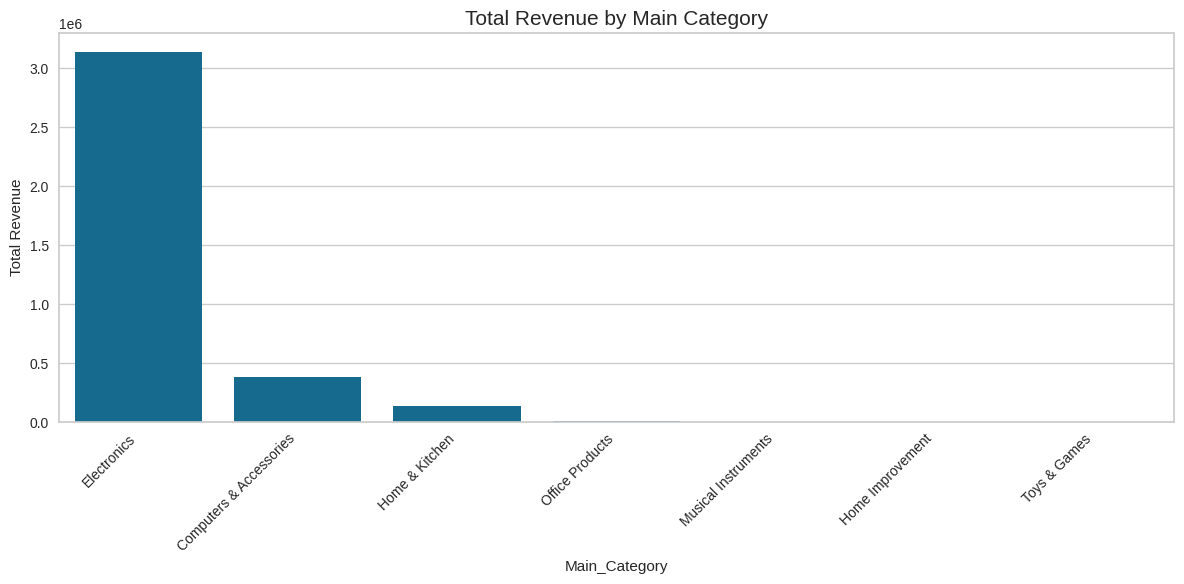

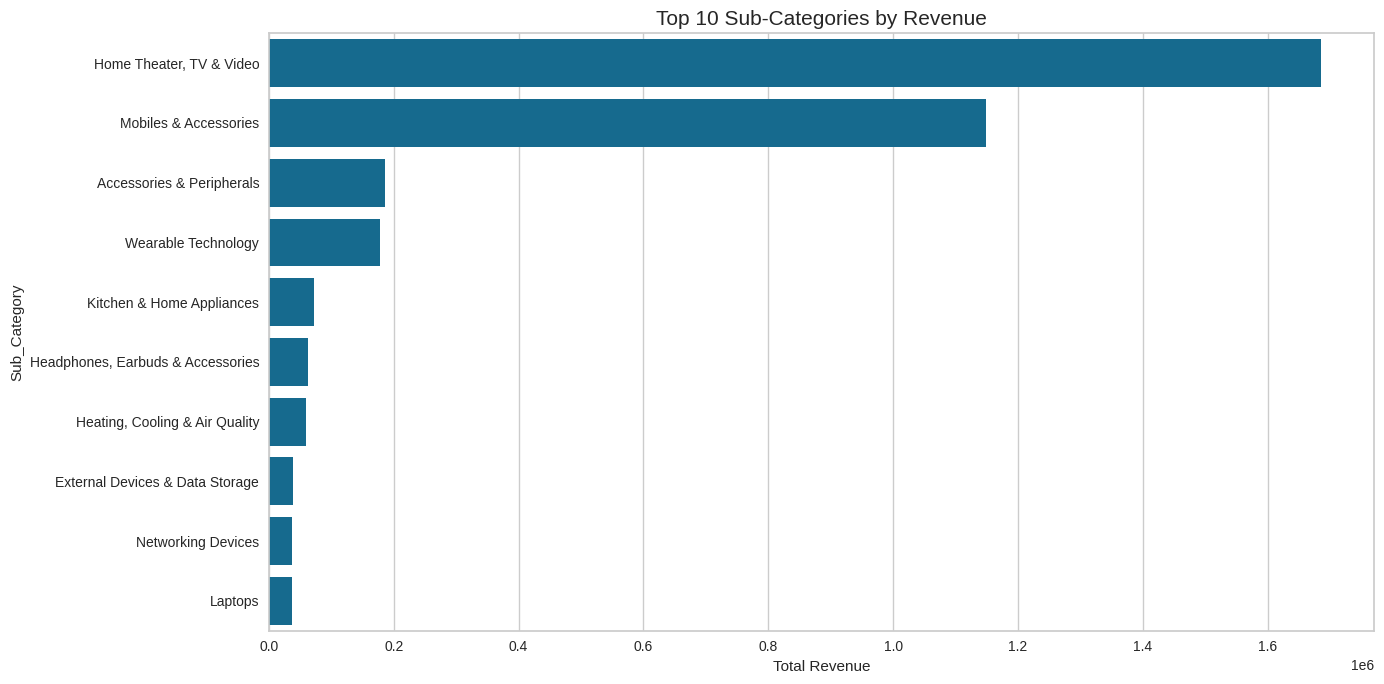

In [ ]:
# Visualize category spending patterns
plt.figure(figsize=(12, 6))
sns.barplot(x='Main_Category', y='Total_Revenue', data=category_spending.sort_values('Total_Revenue', ascending=False))
plt.title('Total Revenue by Main Category', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Top subcategories by revenue
top_subcategories = subcategory_spending.sort_values('Total_Revenue', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='Total_Revenue', y='Sub_Category', data=top_subcategories)
plt.title('Top 10 Sub-Categories by Revenue', fontsize=15)
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

# Discount Sensitivity Levels

## Create The Discount Bins

Identifying this to know the discount distribution

In [ ]:
# Create discount sensitivity bins
valid_df['discount_bin'] = pd.cut(valid_df['discount_percentage'],
                           bins=[0.00, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
                           labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'])

# Analyze purchase patterns by discount level
discount_analysis = valid_df.groupby('discount_bin').agg({
    'product_id': 'count',
    'user_id': 'nunique',
    'discounted_price': 'mean',
    'actual_price': 'mean',
    'difference_price': 'mean',
    'rating_count': 'mean'
}).reset_index()

discount_analysis['conversion_rate'] = discount_analysis['product_id'] / discount_analysis['user_id']
discount_analysis

<ipython-input-17-33b3ce765730>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = valid_df.groupby('discount_bin').agg({


,discount_bin,product_id,user_id,discounted_price,actual_price,difference_price,rating_count,conversion_rate
0,0-10%,24,23,4934.375000,5412.040000,477.665000,20918.708333,1.043478
1,10-20%,61,60,5265.131148,6288.229508,1023.098361,23202.409836,1.016667
2,20-30%,116,113,8539.482759,11570.793103,3031.310345,31844.577586,1.026549
3,30-40%,108,102,7885.337407,12151.361111,4266.023704,23976.194444,1.058824
4,40-50%,167,160,3612.071796,6535.383234,2923.311437,22966.814371,1.043750
5,50%+,589,502,1117.159915,3346.866418,2229.706503,22055.020443,1.173307


## Visualize the Results in Each Bins Distribution on Discount

<ipython-input-19-a1effbe4d515>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='discount_percentage', y='discounted_price', data=df, ci=None)


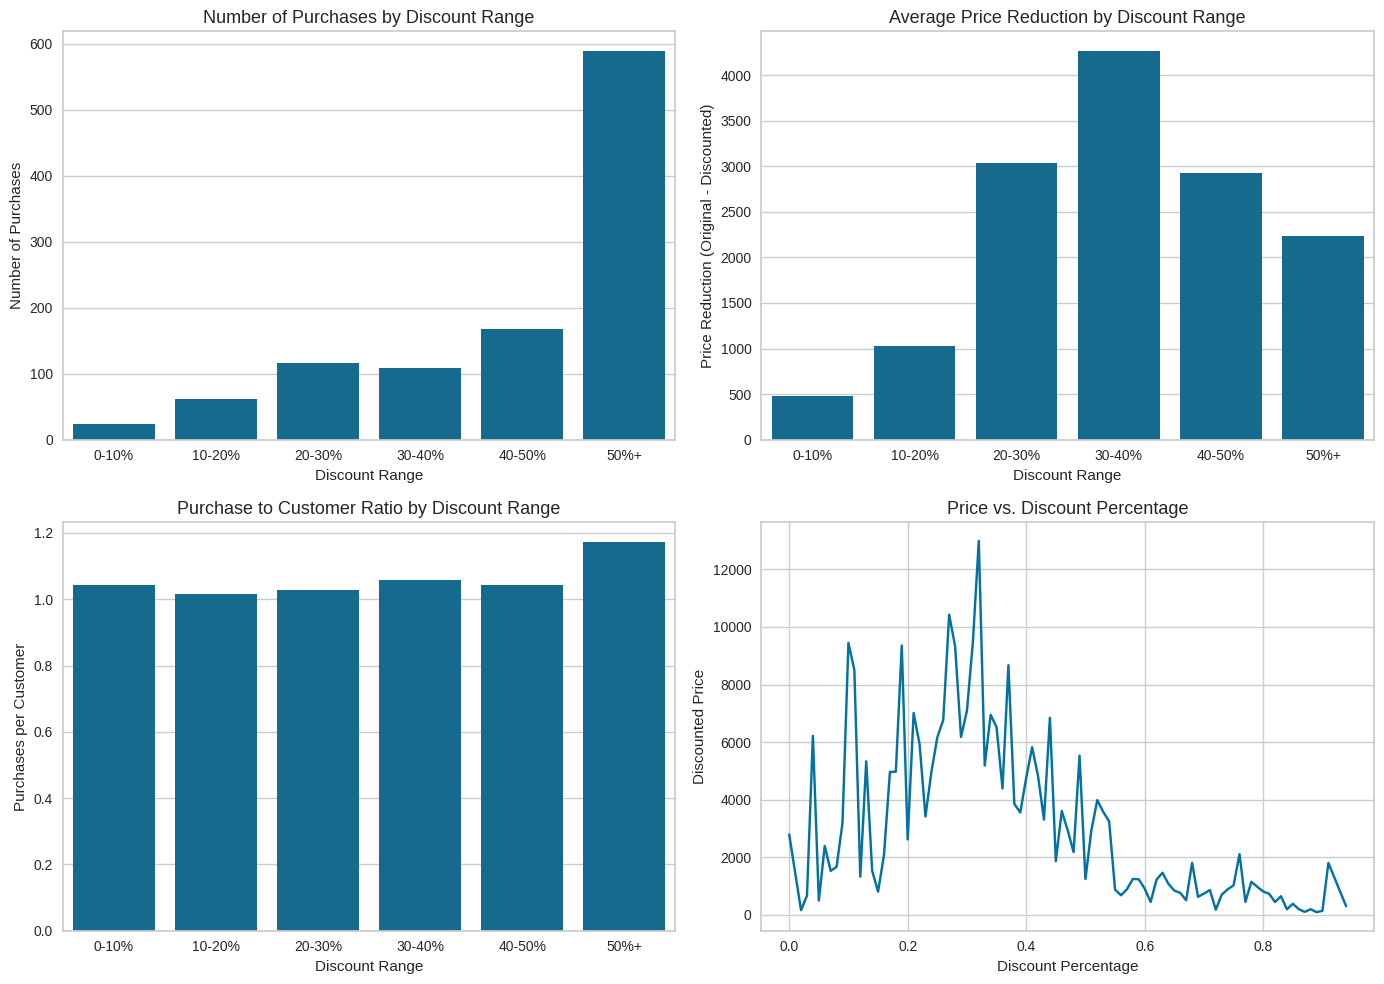

In [ ]:
# Visualize discount sensitivity
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='discount_bin', y='product_id', data=discount_analysis)
plt.title('Number of Purchases by Discount Range', fontsize=13)
plt.xlabel('Discount Range')
plt.ylabel('Number of Purchases')

plt.subplot(2, 2, 2)
sns.barplot(x='discount_bin', y='difference_price', data=discount_analysis)
plt.title('Average Price Reduction by Discount Range', fontsize=13)
plt.xlabel('Discount Range')
plt.ylabel('Price Reduction (Original - Discounted)')

plt.subplot(2, 2, 3)
sns.barplot(x='discount_bin', y='conversion_rate', data=discount_analysis)
plt.title('Purchase to Customer Ratio by Discount Range', fontsize=13)
plt.xlabel('Discount Range')
plt.ylabel('Purchases per Customer')

plt.subplot(2, 2, 4)
sns.lineplot(x='discount_percentage', y='discounted_price', data=df, ci=None)
plt.title('Price vs. Discount Percentage', fontsize=13)
plt.xlabel('Discount Percentage')
plt.ylabel('Discounted Price')

plt.tight_layout()
plt.show()

## Discount Distribution in Heatmap Visualization by Each Main Category

<ipython-input-20-68cacb38eb9f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_discount = valid_df.groupby(['Main_Category', 'discount_bin']).agg({
<ipython-input-20-68cacb38eb9f>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_discount = category_discount.pivot_table(


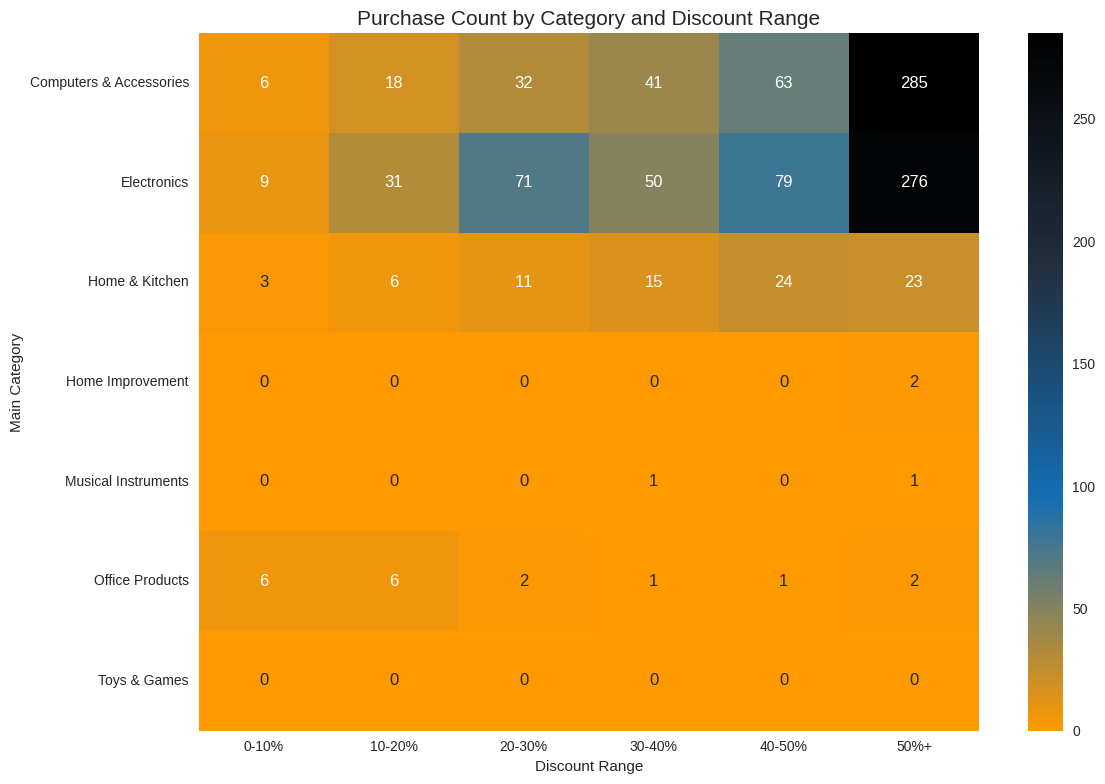

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom continuous colormap based on Amazon palette
amazon_cmap = LinearSegmentedColormap.from_list("amazon_cmap", ['#FF9900', '#146EB4', '#232F3E', '#000000'])

# Analyze discount sensitivity by category
category_discount = valid_df.groupby(['Main_Category', 'discount_bin']).agg({
    'product_id': 'count',
    'user_id': 'nunique'
}).reset_index()

# Pivot for heatmap visualization
pivot_discount = category_discount.pivot_table(
    index='Main_Category',
    columns='discount_bin',
    values='product_id',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_discount, annot=True, cmap=amazon_cmap, fmt='g')
plt.title('Purchase Count by Category and Discount Range', fontsize=15)
plt.xlabel('Discount Range')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

# Product Ratings Influence Analysis

## Create the Ratings Bins

In [ ]:
# Analyze impact of ratings on purchase behavior
valid_df['rating_bin'] = pd.cut(valid_df['rating'],
                          bins=[0, 1, 2, 3, 4, 5],
                          labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

rating_analysis = valid_df.groupby('rating_bin').agg({
    'product_id': 'count',
    'discounted_price': 'mean',
    'discount_percentage': 'mean',
    'rating_count': 'mean'
}).reset_index()

<ipython-input-106-b6acbdcbb64a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_analysis = valid_df.groupby('rating_bin').agg({


## Visualize the Results in Each Bins Distribution for Ratings

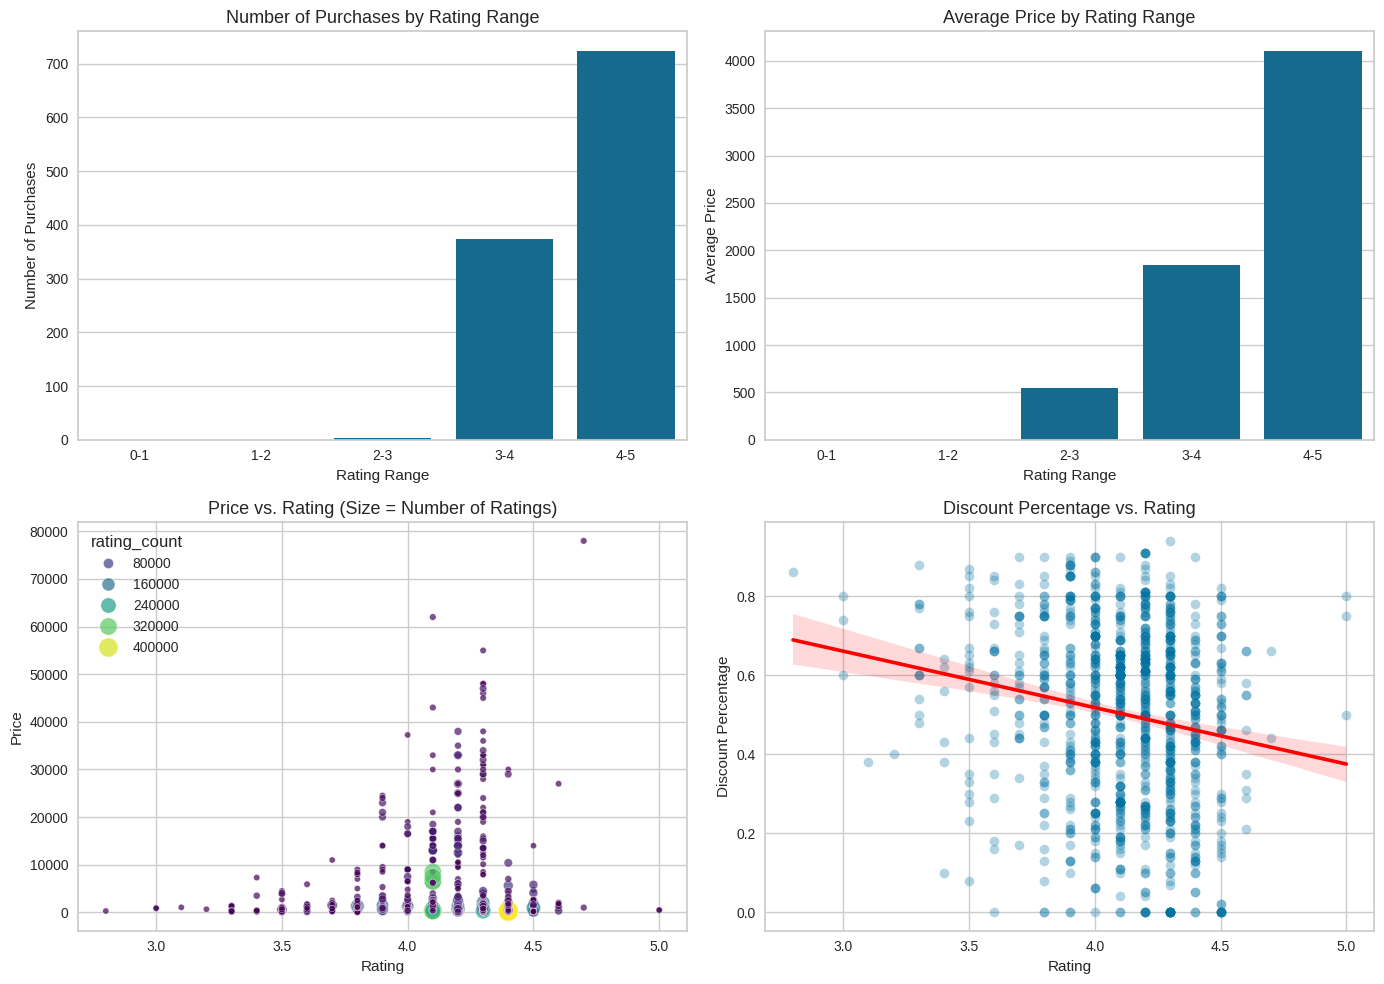

In [ ]:
# Visualize ratings impact
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='rating_bin', y='product_id', data=rating_analysis)
plt.title('Number of Purchases by Rating Range', fontsize=13)
plt.xlabel('Rating Range')
plt.ylabel('Number of Purchases')

plt.subplot(2, 2, 2)
sns.barplot(x='rating_bin', y='difference_price', data=rating_analysis)
plt.title('Average Price by Rating Range', fontsize=13)
plt.xlabel('Rating Range')
plt.ylabel('Average Price')

plt.subplot(2, 2, 3)
sns.scatterplot(data=valid_df, x='rating', y='difference_price', hue='rating_count',
               palette='viridis', size='rating_count', sizes=(20, 200), alpha=0.7)
plt.title('Price vs. Rating (Size = Number of Ratings)', fontsize=13)
plt.xlabel('Rating')
plt.ylabel('Price')

plt.subplot(2, 2, 4)
sns.regplot(x='rating', y='discount_percentage', data=valid_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Discount Percentage vs. Rating', fontsize=13)
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')

plt.tight_layout()
plt.show()


## Checking The Relationship between Ratings and Review

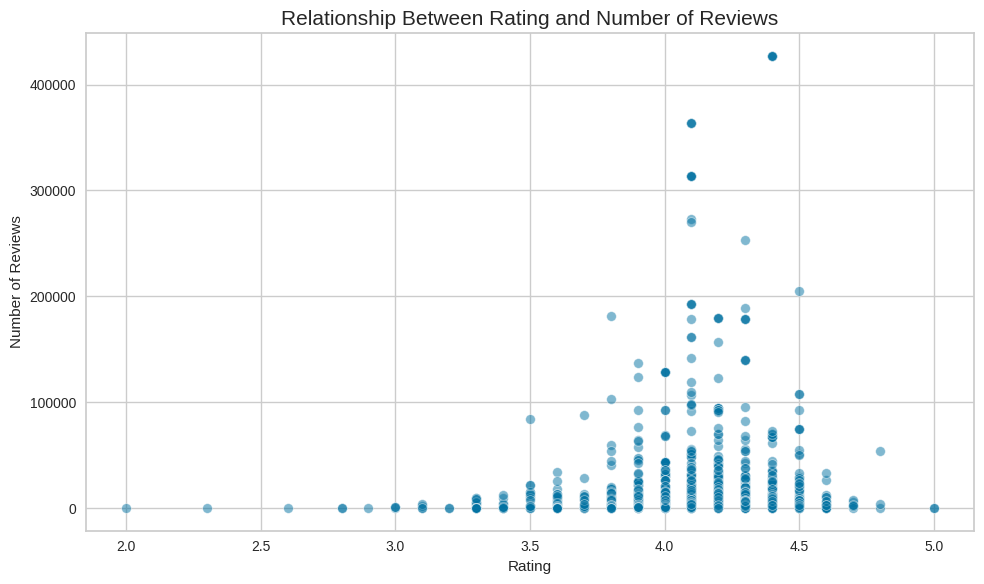

In [ ]:
# Relationship between ratings and reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_df, x='rating', y='rating_count', alpha=0.5)
plt.title('Relationship Between Rating and Number of Reviews', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

# Last Results DataFrame

In [ ]:
valid_df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,Main_Category,Sub_Category,rating_score,difference_price,user_id,user_name,cluster,discount_bin,rating_bin
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,3,50%+,4-5
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta,1,40-50%,3-4
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep,0,50%+,3-4
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed,0,50%+,4-5
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh,0,50%+,4-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,B009P2LITG,Bajaj Majesty RX11 2000 Watts Heat Convector R...,2169.0,3279.0,0.34,4.1,1716.0,Home & Kitchen,"Heating, Cooling & Air Quality",Above Average,1110.0,AGM52TVEKBJENHQAN4Q22ODCL5AA,Mandar Joglekar,1,30-40%,4-5
1098,B00V9NHDI4,Eureka Forbes Trendy Zip 1000 Watts powerful s...,2799.0,3799.0,0.26,3.9,32931.0,Home & Kitchen,Kitchen & Home Appliances,Average,1000.0,AGQ55X6WU4XM455UMFRGQZ7RYEYA,Vasanth,1,20-30%,3-4
1099,B07WGPBXY9,Pigeon by Stovekraft Quartz Electric Kettle (1...,899.0,1249.0,0.28,3.9,17424.0,Home & Kitchen,Kitchen & Home Appliances,Average,350.0,AHMJ5HV6F5PZFFLBC4NQ7JCHYA6A,Well person,3,20-30%,3-4
1100,B00KRCBA6E,Maharaja Whiteline Lava Neo 1200-Watts Halogen...,2499.0,5000.0,0.50,3.8,1889.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average,2501.0,AGJRCXYSPMLOJNP22GLBKWRCYDYQ,Vishal Nagpal,3,40-50%,3-4


# Save and Download Each DataFrame

## Main Dataframe - Cluster Analysis

In [ ]:
# Save the main dataframe with cluster assignments
valid_df.to_csv('ecommerce_with_clusters.csv', index=False)

# Download Files
from google.colab import files
files.download('ecommerce_with_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Product Category Analysis

In [ ]:
# Save the main dataframe with cluster assignments
main_sub_piv.to_csv('product_category.csv', index=False)

# Download Files
from google.colab import files
files.download('product_category.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Customer Segmentation - Spending Behaviour Analysis

In [ ]:
# Save Customer Segmentation - Spending Behaviour Analysis
cluster_analysis.to_csv('customer_segmentation_analysis.csv', index=False)
segment_price_sensitivity.to_csv('segment_price_sensitivity.csv', index=False)

# Download Files
from google.colab import files
files.download('customer_segmentation_analysis.csv')
files.download('segment_price_sensitivity.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Category Spending Analysis

In [ ]:
# Save Category Spending Analysis
category_spending.to_csv('category_spending.csv', index=False)
subcategory_spending.to_csv('subcategory_spending.csv', index=False)

# Download Files
from google.colab import files
files.download('category_spending.csv')
files.download('subcategory_spending.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Discount Sensitivity Analysis

In [ ]:
# Save Discount Sensitivity Analysis
discount_analysis.to_csv('discount_analysis.csv', index=False)
category_discount.to_csv('category_discount_sensitivity.csv', index=False)

# Download Files
from google.colab import files
files.download('discount_analysis.csv')
files.download('category_discount_sensitivity.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ratings Influence Analysis

In [ ]:
# Save Ratings Influence Analysis
rating_analysis.to_csv('rating_analysis.csv', index=False)

# Download Files
from google.colab import files
files.download('rating_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>